<a href="https://colab.research.google.com/github/StanislavParkhomenko/LabSignal/blob/main/Lab4_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
img_list = os.listdir('./dataset')

In [3]:
def get_adjust_gamma(image, gamma=1.0):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
        for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

def plot(img, name_plot):
    plt.subplot(121),plt.imshow(img),plt.title(name_plot)
    plt.xticks([]), plt.yticks([])
    plt.show()

def data_augmentation(img):
    img = cv2.imread(f'./dataset/{img}')
    inverted_pixel = np.invert(img)
    adjust_gamma = get_adjust_gamma(img)
    blur = cv2.blur(img,(5,5))
    
    shape = img.shape
    height = shape[0]
    width = shape[1]
    M90 = cv2.getRotationMatrix2D((width/2, height/2), 90, 1)
    rotate_90 = cv2.warpAffine(img, M90, (width, height))
    
    
    M_hor = np.float32([[1, 0, width/2], [0, 1, 0]])
    img_trhor = cv2.warpAffine(img, M_hor, (width, height))

    M_sk1 = np.float32([[1,1,1], [0,1,1]])
    sk1 = cv2.warpAffine(img, M_sk1, (width, height))
    
    img_vertical_flip = cv2.flip(img, 0)
    img_horizontal_flip = cv2.flip(img, 1)
    
    images = [img, inverted_pixel, adjust_gamma, blur, img_vertical_flip, 
              img_horizontal_flip, img_trhor]
    name_images = ['Original', 'Inverted', 'Adjust', 'Blur', 
                    'Vertical flip', 'Horizontal flip' 'Move']

    for i, name in zip(images, name_images) :
        plot(i, name)
    plot(rotate_90,  'Rotate 90')
    plot(sk1,  'Change angle')

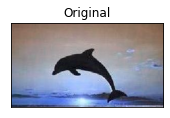

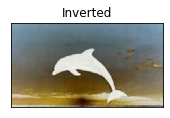

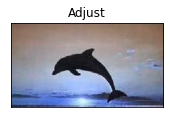

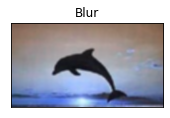

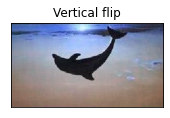

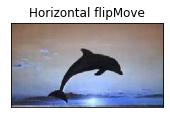

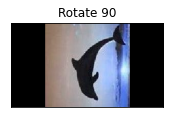

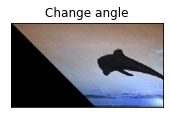

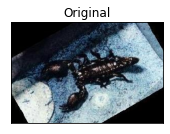

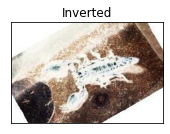

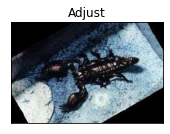

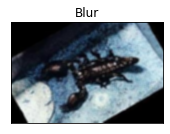

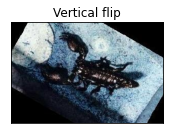

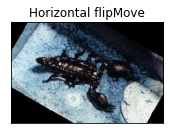

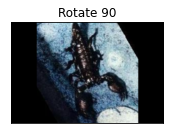

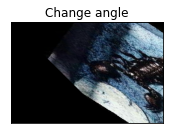

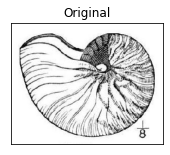

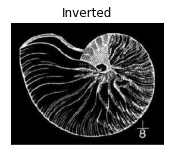

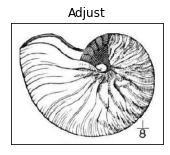

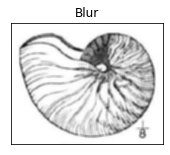

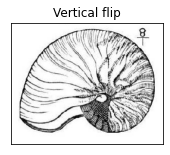

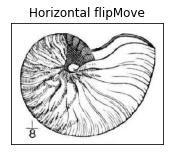

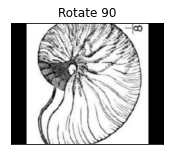

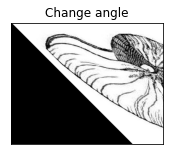

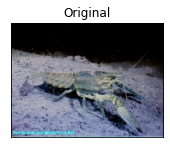

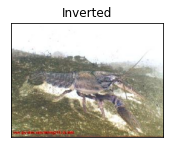

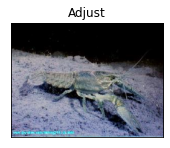

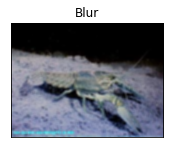

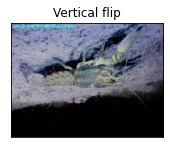

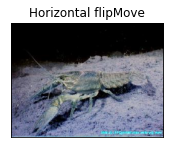

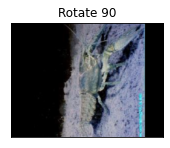

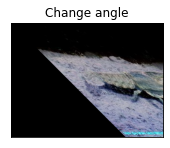

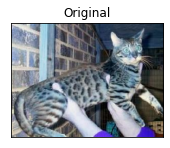

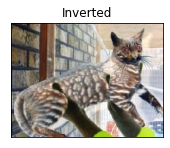

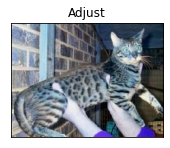

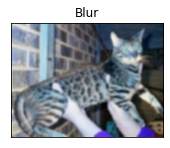

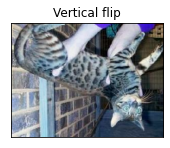

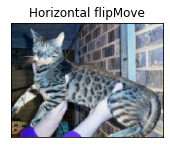

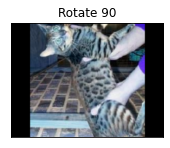

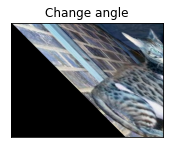

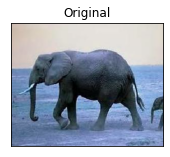

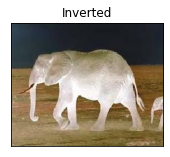

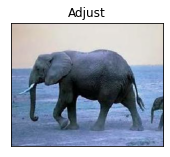

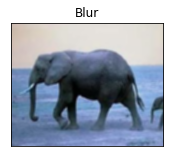

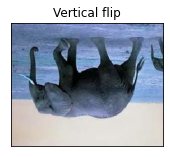

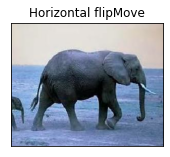

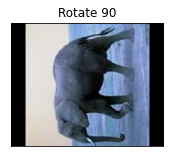

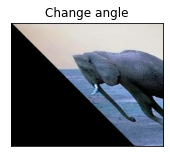

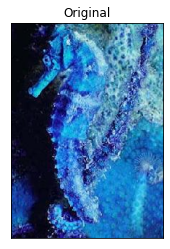

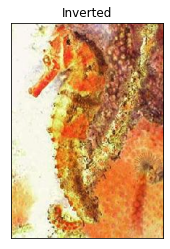

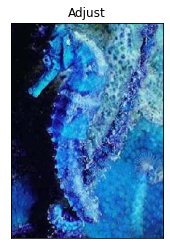

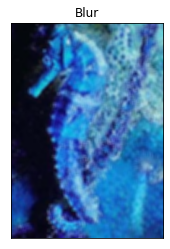

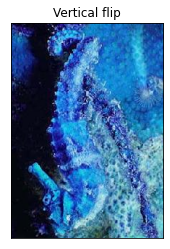

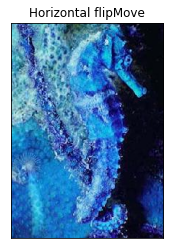

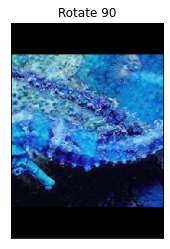

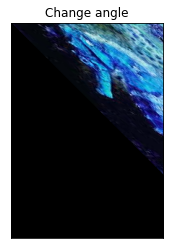

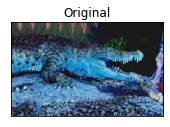

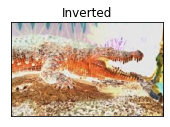

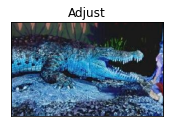

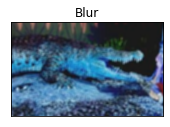

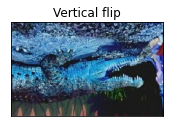

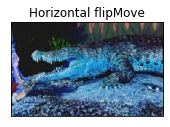

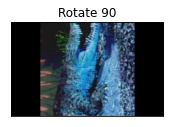

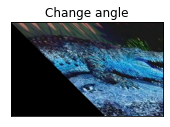

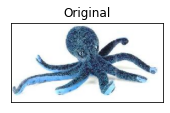

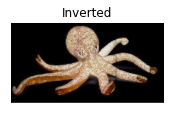

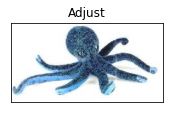

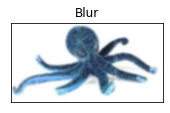

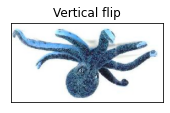

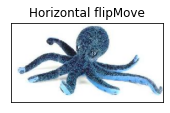

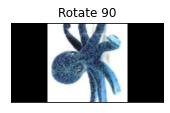

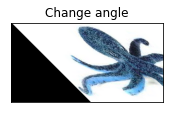

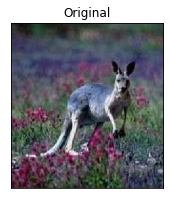

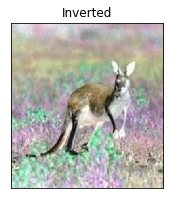

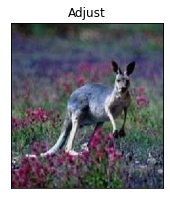

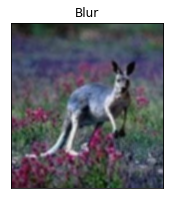

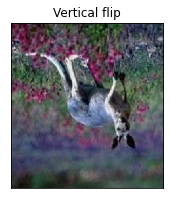

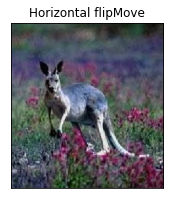

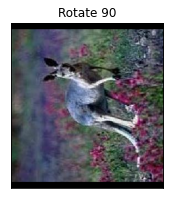

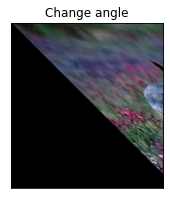

In [4]:
for img in img_list:
    data_augmentation(img)

In [5]:
img = cv2.imread(f'./test_img.jpg')

In [6]:
OUT_IMG_WIDTH = 500
OUT_IMG_HEIGHT = 500

In [7]:
src = np.float32([[900,600], [1000, 500], [200, 500],[400,600]])

In [8]:
dst = np.float32([[0, 1000],[0,0],[1000,0], [1000, 1000]])

In [9]:
M = cv2.getPerspectiveTransform(src, dst)

In [10]:
wraped_img = cv2.warpPerspective(img, M, (1000,1000))

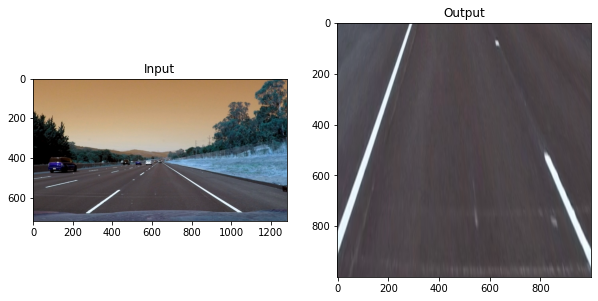

In [11]:
plt.figure(figsize=(10, 10))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(wraped_img),plt.title('Output')
plt.show()